In [1]:

import warnings

warnings.filterwarnings('ignore')


In [2]:

#data sources: 
#https://data.world/nrippner/titanic-disaster-dataset
#https://github.com/grammakov/USA-cities-and-states

import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('titanic.csv')


In [3]:

len(df)


1310

In [4]:

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:


df = df.loc[df['survived'].isin([0,1])]
len(df)


1309

In [6]:

df.index = df.index.rename('id')


In [7]:

rename_dict = {
    'pclass':'ticket_class',
    'sibsp':'num_of_siblings_or_spouses_aboard',
    'parch':'num_of_parents_or_children_aboard',
    'home.dest': 'home_destination'
}

df = df.rename(columns=rename_dict)


In [8]:

def get_port_of_embarkation_name(code):
    if code == 'C':
        return 'Cherbourg'
    if code == 'Q':
        return 'Queenstown'
    if code == 'S':
        return 'Southampton'
    
df['embarked'] = df['embarked'].apply(get_port_of_embarkation_name)


In [9]:

df[['first_name', 'last_name']] = df['name'].str.split(',', expand=True)[[1, 0]]


In [10]:

df['first_name'] = df['first_name'].str.replace(r'([a-zA-Z]+\.)|([\(\)\"\"]+)', '').str.replace('[\/\-]+', ' ').str.strip().str.split(' ', expand=True)[0]


In [11]:

df[['name', 'first_name', 'last_name']].sample(10)


,name,first_name,last_name
id,,,
751,"Dantcheff, Mr. Ristiu",Ristiu,Dantcheff
379,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",Harvey,Collyer
1129,"Petterson, Mr. Johan Emil",Johan,Petterson
46,"Cairns, Mr. Alexander",Alexander,Cairns
1127,"Petroff, Mr. Nedelio",Nedelio,Petroff
334,"Banfield, Mr. Frederick James",Frederick,Banfield
116,"Fortune, Mrs. Mark (Mary McDougald)",Mark,Fortune
899,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Oscar,Johnson
1139,"Rekic, Mr. Tido",Tido,Rekic


In [12]:

# df['home_destination'].unique()


In [13]:

# us_cities_states_counties = pd.read_csv('us_cities_states_counties.csv', sep='|')
# us_cities_states_counties.head()


In [14]:

# import re

# us_location_pattern = re.compile(r'^[A-Za-z\s]+\,\s{1}[A-Z]{2}$')

# def is_us_destination(destination):
#     if not type(destination) == str:
#         return False
#     destination = destination.split(' / ')[0]
#     if not us_location_pattern.match(destination):
#         return False
#     else:
#         split = destination.split(', ')
#         city = split[0].lower()
#         state = split[1].lower()
#         city_rows = us_cities_states_counties.loc[us_cities_states_counties['City'].str.lower() == city]
#         return state in city_rows['State short'].str.lower().values or state in city_rows['State full'].str.lower().values
        
# def is_us_destination_fuzzy(destination):
#     if not type(destination) == str:
#         return False
#     split = re.split(r'\s*[,\/]+\s*', destination.lower())
#     split_set = set(split)
#     city_rows = us_cities_states_counties.loc[us_cities_states_counties['City'].str.lower().isin(split_set)]
#     return len(split_set & set(city_rows['State short'].str.lower().values)) > 0 or len(split_set & set(city_rows['State full'].str.lower().values)) > 0

# df['is_us'] = df['home_destination'].apply(is_us_destination)


In [15]:

# df['is_us'].value_counts(dropna=False)


In [16]:

# df = df.loc[df['is_us']]


In [17]:

df.head()


,ticket_class,survived,name,sex,age,num_of_siblings_or_spouses_aboard,num_of_parents_or_children_aboard,ticket,fare,cabin,embarked,boat,body,home_destination,first_name,last_name
id,,,,,,,,,,,,,,,,
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,Southampton,2,NaN,"St Louis, MO",Elisabeth,Allen
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON",Hudson,Allison
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",Helen,Allison
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",Hudson,Allison
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",Hudson,Allison


In [18]:

df.describe()


,ticket_class,survived,age,num_of_siblings_or_spouses_aboard,num_of_parents_or_children_aboard,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


array([[<AxesSubplot:title={'center':'ticket_class'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'num_of_siblings_or_spouses_aboard'}>,
        <AxesSubplot:title={'center':'num_of_parents_or_children_aboard'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'body'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

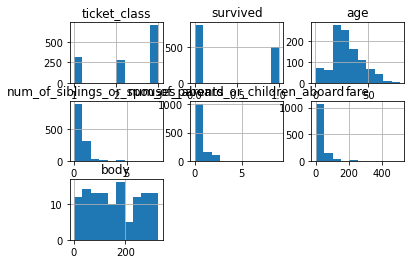

In [19]:

df.hist()


In [20]:

df.columns


Index(['ticket_class', 'survived', 'name', 'sex', 'age',
       'num_of_siblings_or_spouses_aboard',
       'num_of_parents_or_children_aboard', 'ticket', 'fare', 'cabin',
       'embarked', 'boat', 'body', 'home_destination', 'first_name',
       'last_name'],
      dtype='object')

In [21]:

def get_X(df: pd.DataFrame):
    features = pd.DataFrame(index=df.index)
    columns = ['ticket_class', 'age', 'num_of_siblings_or_spouses_aboard', 'num_of_parents_or_children_aboard', 'fare', 'embarked', 'sex']
    features[columns] = df[columns]
    features = pd.get_dummies(features, columns=['embarked', 'sex'], drop_first=True)
    return features


In [22]:

X = get_X(df)
y = df['survived']


In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [24]:

X_train.head()


,ticket_class,age,num_of_siblings_or_spouses_aboard,num_of_parents_or_children_aboard,fare,embarked_Queenstown,embarked_Southampton,sex_male
id,,,,,,,,
376,2.0,24.0,0.0,0.0,10.5000,0,1,1
578,2.0,30.0,1.0,0.0,21.0000,0,1,1
494,2.0,24.0,1.0,1.0,37.0042,0,0,0
314,1.0,50.0,1.0,1.0,211.5000,0,0,0
1098,3.0,3.0,3.0,1.0,21.0750,0,1,0


In [25]:

X_test.head()


,ticket_class,age,num_of_siblings_or_spouses_aboard,num_of_parents_or_children_aboard,fare,embarked_Queenstown,embarked_Southampton,sex_male
id,,,,,,,,
1148,3.0,35.0,0.0,0.0,7.1250,0,1,1
1049,3.0,20.0,1.0,1.0,15.7417,0,0,1
982,3.0,NaN,0.0,0.0,7.8958,0,1,1
808,3.0,NaN,0.0,0.0,8.0500,0,1,1
1195,3.0,NaN,0.0,0.0,7.7500,1,0,1


In [26]:

import xgboost as xgb

classifier = xgb.XGBClassifier(max_depth=3)
classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:

%%capture
!pip install shap


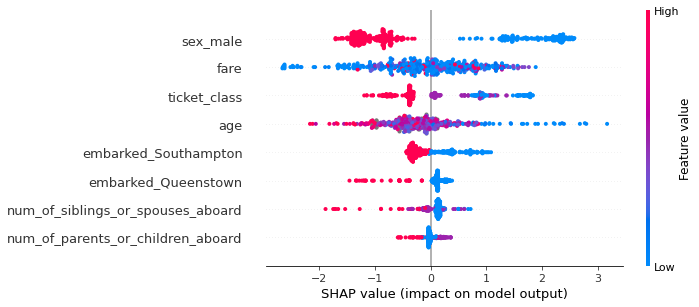

In [28]:

import shap

explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [29]:

from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       254
         1.0       0.83      0.64      0.72       178

    accuracy                           0.80       432
   macro avg       0.80      0.77      0.78       432
weighted avg       0.80      0.80      0.79       432



In [30]:

%%capture

!pip install --upgrade bias-detector


In [31]:

from bias_detector.BiasDetector import BiasDetector

bias_detector = BiasDetector(country='US')


In [32]:

df_test = df.loc[X_test.index]


In [33]:

first_names = df_test['first_name']
last_names = df_test['last_name']
y_pred = classifier.predict(X_test)
y_true = y_test
y_scores = classifier.predict_proba(X_test)[:,1]


In [34]:

df_test['sex'].value_counts(dropna=False)


male      281
female    151
Name: sex, dtype: int64

In [35]:

p_groups = pd.DataFrame(index=df_test.index)
p_groups['male'] = df_test['sex'] == 'male'
p_groups['female'] = df_test['sex'] == 'female'
p_groups = p_groups.fillna(0)
p_groups = p_groups.astype(float)
p_groups = p_groups.reset_index(drop=True)


In [36]:

p_groups.sum()


male      281.0
female    151.0
dtype: float64

In [37]:

p_groups.head()


,male,female
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [38]:

direct_bias_report = bias_detector.get_bias_report(y_pred = y_pred, 
                                            y_true = y_true, 
                                            p_groups = p_groups,
                                            detect_gender_bias = True,
                                            detect_race_bias = False)


In [39]:

direct_bias_report.print_summary()


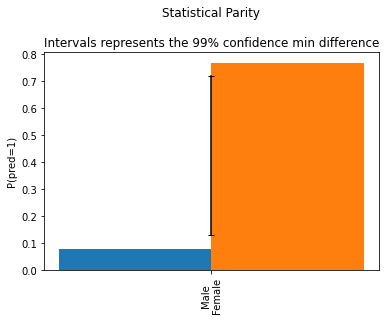

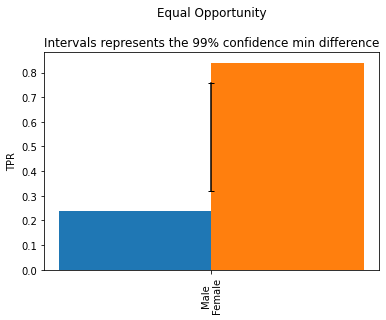

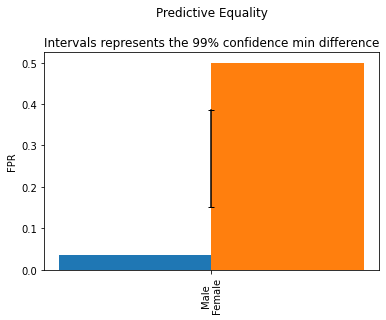

In [40]:

direct_bias_report.plot_summary()


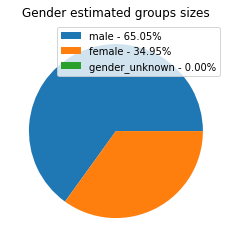

In [41]:

direct_bias_report.plot_groups()


In [42]:

direct_bias_report.estimated_groups_sizes


male              281
female            151
gender_unknown      0
dtype: int64

In [43]:

inferred_bias_report = bias_detector.get_bias_report(first_names = first_names,
                                            last_names = last_names,
                                            y_pred = y_pred, 
                                            y_true = y_true, 
                                            detect_gender_bias = True,
                                            detect_race_bias = True)


In [44]:

inferred_bias_report.print_summary()


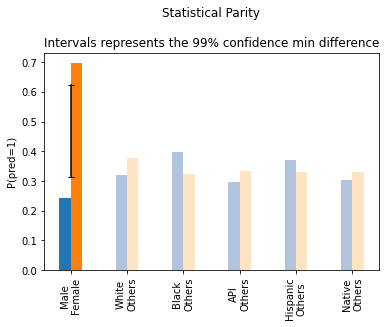

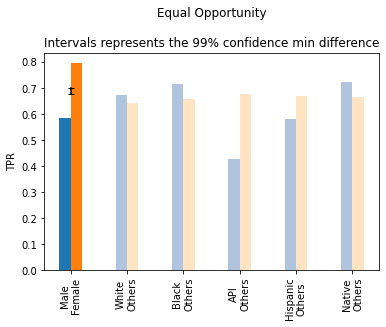

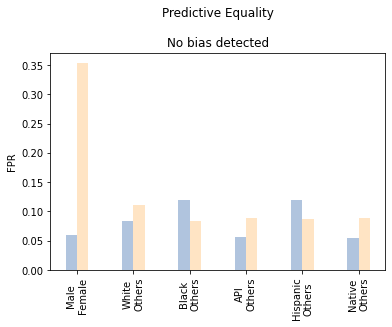

In [45]:

inferred_bias_report.plot_summary()


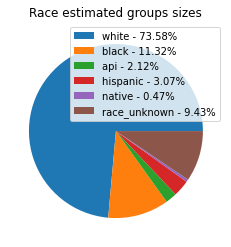

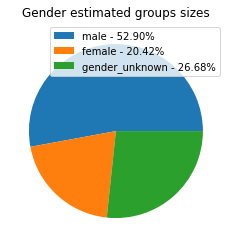

In [46]:

inferred_bias_report.plot_groups()


In [47]:

inferred_bias_report.estimated_groups_sizes


male              228
female             88
white             312
black              48
api                 9
hispanic           13
native              2
gender_unknown    115
race_unknown       40
dtype: int64

In [48]:

df_test.reset_index(drop=True)[['first_name', 'last_name']].join(inferred_bias_report.p_groups).sample(10)


,first_name,last_name,male,female,white,black,api,hispanic,native
349,Julia,Barry,0.000000,1.000000,0.863824,0.081458,0.003370,0.030500,0.005712
344,Sidney,Goodwin,0.928571,0.071429,0.575719,0.409837,0.002365,0.002480,0.009599
195,Orsen,Sirayanian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
394,Guentcho,Bostandyeff,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
389,Vassilios,Katavelas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172,Charles,Hays,0.996076,0.003924,0.930762,0.039627,0.001266,0.003686,0.005377
302,John,Bengtsson,0.996345,0.003655,0.969371,0.006783,0.001995,0.004147,0.004827
250,Joseph,Ismay,0.996451,0.003549,0.921390,0.025530,0.021200,0.029360,0.001440
358,Thomas,McCormack,0.997831,0.002169,0.974833,0.005161,0.001496,0.003641,0.003262
346,Marion,Wright,0.282353,0.717647,0.479418,0.508704,0.000367,0.004025,0.007486


In [49]:

bias_detector.get_features_groups_correlation(first_names = first_names,
                                            last_names = last_names, features=X_test)


,male_correlation,female_correlation,white_correlation,black_correlation,api_correlation,hispanic_correlation,native_correlation
ticket_class,-0.243730,0.010038,-0.122978,-0.152287,0.128161,-0.003452,-0.029846
age,0.234712,-0.168692,0.165937,-0.059513,-0.044503,-0.058893,0.036010
num_of_siblings_or_spouses_aboard,0.027651,0.025737,0.029292,0.066896,-0.061708,-0.072092,0.138135
num_of_parents_or_children_aboard,0.057575,0.042770,0.048623,0.099354,-0.064993,-0.100496,0.064185
fare,0.053703,0.071300,0.076330,0.061158,-0.001893,-0.067631,0.058121
embarked_Queenstown,-0.019206,0.169752,0.110737,-0.049664,-0.049379,0.011407,-0.054550
embarked_Southampton,0.082538,-0.090631,0.011149,0.100265,0.038108,-0.116438,0.050909
sex_male,0.327044,-0.615262,-0.047330,-0.073640,0.051959,-0.074259,-0.011737
